<h3>Лабораторная работа №7</h3>
<p style="font-size: 16px">Анализ помех для разных типов антенн</p>
<hr>
<p style="font-size: 14px">Цель:</p>
<ol>
    <li>Исследование помех при разных типах антенн.</li>
</ol>
<hr>
<p><b><u>Задание 1</u></b></p>
<p style="width: 60%">Используя табличные значения для углов направленности (Таблица 2,
для антенных решеток 64x1, 32x1) подберите коэффициент k для модели с основным
лепестком и потерями на боковые лепестки (формула 1, для каждой антенной
решетки), так чтобы получить наилучшую аппроксимацию коэффициентов
усиления G1, представленные в таблице 1.</p>
<hr>
<p><b><u>Задание 2</u></b></p>
<p style="width: 60%">Рассчитайте вероятность блокировки в двухмерной и трехмерной модели
для высоты базовой станции 10 м, высоты приемника 1.4 м, высоты человека 1.7 м.
В случае двухмерного сценария высоту базовой станции взять равной высоте
приемника. Построить график зависимости вероятностей от интенсивности
блокирующих объектов, оценить и сравнить полученные результаты.</p>
<hr>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math as m
import scipy.stats as st

In [3]:
# Табличные значения:
a32 = 3.171
a64 = 1.585
G132 = 28.76
G164 = 57.51

# Пусть функция для вычисления коэффициента принимает наши вычисление и усиление.
# В данном случае больше ничего не нужно
def findK(a, G):
    # Преобразуем первую формулу и выразим k:
    return ((2 / G) + (m.cos(a/2) - 1)) / (- 1 - m.cos(a / 2))

print('Для решётки 64x1 значения G2 = %.2f, k = %.4f' % (G164 * findK(a64, G164), findK(a64, G164)))
print('Для решётки 32x1 значения G2 = %.2f, k = %.4f' % (G132 * findK(a32, G132), findK(a32, G132)))

Для решётки 64x1 значения G2 = 8.89, k = 0.1546
Для решётки 32x1 значения G2 = 27.59, k = 0.9593


Далее перейдём ко второй части

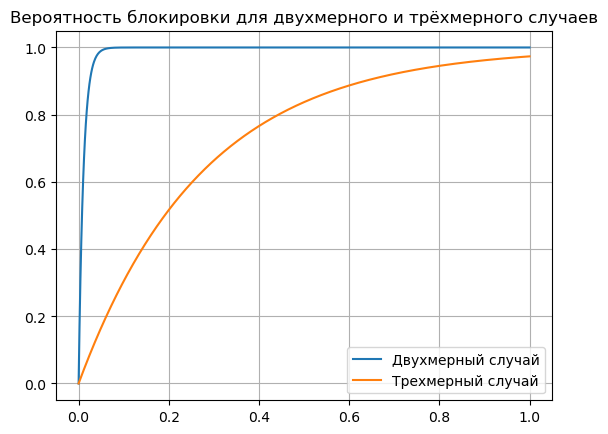

In [7]:
hBlock = 1.7
hRecep = 1.4
rB = 0.46 # Занимательный факт. Данный параметр - средний показатель талии девушек в возрасте 20-29 лет, 
# что, конечно, идеальный вариант для радиуса объекта блокировки

x = 100 # Приближаемся к более-менее реальным величинам и берём расстояние до станции в 100м

# Функция для нахождения вероятности блокировки:
def pBlock(hBase, l):
    return 1 - m.exp(- 2 * l * rB * (x * (hBlock - hRecep) / (hBase - hRecep) + rB))

# Для двумерного случая:
dots2D = np.linspace(0, 1, 1000)
values2D = [0] * len(dots2D)
for i in range(len(dots2D)):
    values2D[i] = pBlock(hBlock, dots2D[i])

# Для трехмерного случая:
dots3D = np.linspace(0, 1, 1000)
values3D = [0] * len(dots3D)
for i in range(len(dots2D)):
    values3D[i] = pBlock(10, dots3D[i])

plt.plot(dots2D, values2D, label = 'Двухмерный случай')
plt.plot(dots3D, values3D, label = 'Трехмерный случай')

plt.title('Вероятность блокировки для двухмерного и трёхмерного случаев')
plt.legend()
plt.grid()
plt.show()

<hr>
<h3>Выводы:</h3>
<ol>
    <li>Исследовали помехи при разных типах антенн.</li>
    <li>Сравнили двухмерную и трёхмерную модели вероятности блокировок</li>
</ol>